In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [49]:
data = {
'Рыночная цена': [985.6, 969.6, 963.2, 888.1],
'Срок до погашения, дн': [68, 201, 293, 545],
'Номинал': [1000, 1000, 1000, 1000],
'Сумма купона': [32.41, 36.90, 35.40, 22.44],
'Срок до выплаты купона': [[68], [26, 201], [117, 293], [26, 206, 386, 545]]
}

In [78]:
df = pd.DataFrame(data)

In [79]:
df

,Рыночная цена,"Срок до погашения, дн",Номинал,Сумма купона,Срок до выплаты купона
0,985.6,68,1000,32.41,[68]
1,969.6,201,1000,36.90,"[26, 201]"
2,963.2,293,1000,35.40,"[117, 293]"
3,888.1,545,1000,22.44,"[26, 206, 386, 545]"


In [80]:
df['Бескупонная доходность'] = [14.31, 12.69, 12.30, 12.1]

In [85]:
df['Лет до погашения'] = (df['Срок до погашения, дн']/365).round(2)

In [86]:
df['Лет до погашения']

0    0.19
1    0.55
2    0.80
3    1.49
Name: Лет до погашения, dtype: float64

In [53]:
df['Бескупонная доходность']

0    14.31
1    12.69
2    12.30
3    12.10
Name: Бескупонная доходность, dtype: float64

In [58]:
g_curve = np.array([])

for ind, row in df.iterrows():
    maturity = row['Срок до погашения, дн']
    coupon_dates = row['Срок до выплаты купона']
    coupon_amount = row['Сумма купона']
    bond_yield = row['Бескупонная доходность']

In [59]:
g_curve

array([], dtype=float64)

In [60]:
for coupon_date in coupon_dates:
    # Расчет времени до купона в долях года
    time_to_coupon = coupon_date / 365

    # Расчет дисконтированной значения купона
    discounted_coupon = coupon_amount / (1 + bond_yield / 100)**time_to_coupon

    # Добавление дисконтированной купонной выплаты к g-кривой
    g_curve = np.append(g_curve, discounted_coupon)

# Расчет дисконтированной значения номинала
discounted_nominal = df['Номинал'][ind] / (1 + bond_yield / 100)**(maturity / 365)

# Добавление дисконтированного номинала к g-кривой
g_curve = np.append(g_curve, discounted_nominal)

In [90]:
g_curve

array([ 22.25816216,  21.03905652,  19.88672272,  18.92144058,
       843.20145171])

In [62]:
time = np.arange(len(g_curve))

In [87]:
time = df['Лет до погашения'].to_list()

In [88]:
time

[0.19, 0.55, 0.8, 1.49]

In [ ]:
plt.plot(time, g_curve)
plt.xlabel('Время')
plt.ylabel('Дисконтированная выплата')
plt.title('g-кривая бескупонной доходности')
plt.show()

In [115]:
def g_curve_model(t, params):

    beta0, beta1, beta2, tau1, g1, g2, g3, g4, g5, g6, g7, g8, g9 = params

    k = 1.6
    a1 = 0
    a2 = 0.6
    a3 = a2 + a2 * k**1
    a4 = a3 + a2 * k**2
    a5 = a4 + a2 * k**3
    a6 = a5 + a2 * k**4
    a7 = a6 + a2 * k**5
    a8 = a7 + a2 * k**6
    b1 = a2
    b2 = b1 * k
    b3 = b2 * k
    b4 = b3 * k
    b5 = b4 * k
    b6 = b5 * k
    b7 = b6 * k
    b8 = b7 * k

    return beta0 + (beta1 + beta2)*(tau1/t)*(1 - np.exp(-t/tau1)) - beta2*np.exp(-t/tau1) + g1*np.exp(-((t-a1)**2)/b1**2) + g2*np.exp(-((t-a2)**2)/b2**2)+ g3*np.exp(-((t-a3)**2)/b3**2) + g4*np.exp(-((t-a4)**2)/b4**2) + g5*np.exp(-((t-a5)**2)/b5**2) + g6*np.exp(-((t-a6)**2)/b6**2) + g7*np.exp(-((t-a7)**2)/b7**2) + g8*np.exp(-((t-a8)**2)/b8**2)




In [127]:
t = np.linspace(0.01, 10, 100)

In [128]:
params = [1126.95, 366.00, -374.43, 0.32,	0.48,	-0.95,	8.35,	-1.83,	-2.28,	-1.22,	-0.77,	0.00, 0.00]

In [133]:
result = (g_curve_model(t, params)/100).round(2)

In [132]:
result

array([14.835, 13.868, 13.164, 12.652, 12.28 , 12.01 , 11.815, 11.674,
       11.572, 11.499, 11.447, 11.41 , 11.384, 11.364, 11.351, 11.34 ,
       11.332, 11.325, 11.319, 11.314, 11.308, 11.303, 11.298, 11.292,
       11.287, 11.281, 11.275, 11.27 , 11.265, 11.26 , 11.255, 11.25 ,
       11.246, 11.242, 11.239, 11.236, 11.233, 11.231, 11.229, 11.227,
       11.226, 11.225, 11.224, 11.223, 11.223, 11.222, 11.222, 11.222,
       11.222, 11.222, 11.223, 11.223, 11.223, 11.223, 11.224, 11.224,
       11.225, 11.225, 11.225, 11.226, 11.226, 11.227, 11.227, 11.228,
       11.228, 11.228, 11.229, 11.229, 11.23 , 11.23 , 11.231, 11.231,
       11.231, 11.232, 11.232, 11.233, 11.233, 11.234, 11.234, 11.234,
       11.235, 11.235, 11.236, 11.236, 11.237, 11.237, 11.238, 11.238,
       11.238, 11.239, 11.239, 11.24 , 11.24 , 11.24 , 11.241, 11.241,
       11.242, 11.242, 11.242, 11.243])

In [137]:
data1 = {'t': np.linspace(0.01, 10, 100), 'Y' :[(g_curve_model(t, params)/100).round(2) for t in np.linspace(0.01, 10, 100)] }

In [ ]:
data1

In [134]:
data1 = {'x': np.arange(2.7, 11.0, 0.1), 'y1' :[x**2 for x in np.arange(2.7, 11.0, 0.1)] }
data2 = {'x': np.arange(0, 2.7, 0.1), 'y2' :[10 - x for x in np.arange(0, 2.7, 0.1)]}

In [ ]:
data1

In [139]:
df1 = pd.DataFrame(data1)

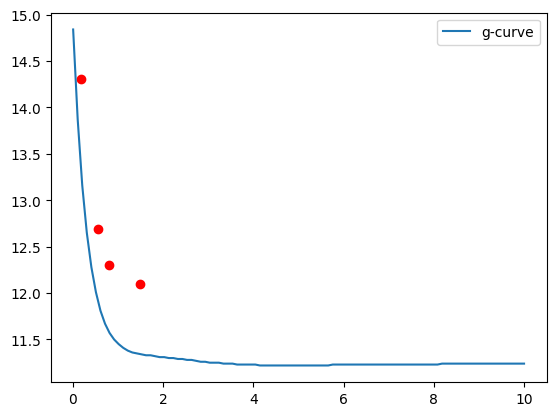

In [141]:
plt.plot(df1['t'], df1['Y'], label = 'g-curve')
# plt.plot(df2['x'], df2['y2'], label = 'y2 = 10 -x')
plt.scatter(df['Лет до погашения'], df['Бескупонная доходность'], color = 'r' )
plt.legend()
plt.show()